# VirES - access to Swarm virtual observatories data

This notebook demonstrates access to Swarm VOBS_1M and V_OBS_4M virtual observatory data via VirES for Swarm API.

Avalable observed and core field data collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_` | Swarm 1 month data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:<code>` | Swarm 1 month data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_` | Swarm 4 month data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:<code>` | Swarm 4 months data from one selected virtual observatory |

Avalable field secular variation data collections

| Collection Name | Description |
|---|---|
| `SW_OPER_VOBS_1M_2_:SecularVariation` | Swarm 1 month secular variation data from all virtual observatories |
| `SW_OPER_VOBS_1M_2_:SecularVariation:<code>` | Swarm 1 month secular variation data from one selected virtual observatory |
| `SW_OPER_VOBS_4M_2_:SecularVariation` | Swarm 4 month secular variation data from all virtual observatories |
| `SW_OPER_VOBS_4M_2_:SecularVariation:<code>` | Swarm 4 months secular variation data from one selected virtual observatory |

The `<code>` is a 7-letter "virtual observatories" identifier, unique for each of the 300 "virtual observatories".

Avalable observed and core filed variables (same for all collections)

| Variable | Unit | Dimension | Description |
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_CF` | $\text{nT}$ | vector [3] | Core magnetic field vector in ITRF NEC frame. |
| `B_OB` | $\text{nT}$ | vector [3] | Observed magnetic field vector in ITRF NEC frame. |
| `sigma_CF` | $\text{nT}$ | vector [3] | Estimated error of the core magnetic field vector in ITRF NEC frame. |
| `sigma_OB` | $\text{nT}$ | vector [3] | Estimated error of the observed magnetic field vector in ITRF NEC frame. |

Avalable secular variation variables (same for all collections)

| Variable | Unit | Dimension | Description | 
|---|---|---|---|
| `SiteCode` | $-$ | char [7] | virtual observatory identifier |
| `Timestamp` | $-$ | scalar | UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_SV` | $\text{nT}/\text{yr}$ | vector [3] | Field secular variation vector in ITRF NEC frame. |
| `sigma_SV` | $\text{nT}/\text{yr}$ | vector [3] | Estimated error of the field secular variation vector in ITRF NEC frame. |


In [1]:
# pre-release setup

! pip install --upgrade 'git+https://github.com/ESA-VirES/VirES-Python-Client@swarm_gvo#egg=viresclient'


  Cloning https://github.com/ESA-VirES/VirES-Python-Client (to revision swarm_gvo) to /tmp/pip-install-qb09s1ny/viresclient
  Created wheel for viresclient: filename=viresclient-0.8.0a0-py3-none-any.whl size=70959 sha256=441776718fd71cff91b4d67e6f457fa33f2b00599b780a14251e2c923e8616bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-dfeldrnp/wheels/d3/d4/f3/ed4b44570cfc4c1529d54fcdf6c4fba7573c4becadc76e9c64
Successfully built viresclient
  Attempting uninstall: viresclient
    Found existing installation: viresclient 0.8.0a0
    Uninstalling viresclient-0.8.0a0:
      Successfully uninstalled viresclient-0.8.0a0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
from matplotlib.pyplot import figure, subplot, show
from viresclient import SwarmRequest

#server_url = None # default VirES server
server_url = 'https://staging.viresdisc.vires.services/ows' # DISC server

request = SwarmRequest(server_url)

VOBS_VARIABLES = ['SiteCode', 'B_CF', 'B_OB', 'sigma_CF', 'sigma_OB']
VOBS_SV_VARIABLES = ['SiteCode', 'B_SV', 'sigma_SV']

## VOBS_1M - list of virtual observatories

In [3]:
observatories = request.available_observatories('SW_OPER_VOBS_1M_2_', details=True)

print('Avaiable observatories and temporal extent of their data:')
print('site\t\tstartTime\t\t\tendTime')
for item in zip(observatories['site'], observatories['startTime'], observatories['endTime']):
    print("%s\t\t%s\t%s" % item)

Avaiable observatories and temporal extent of their data:
site		startTime			endTime
N06E002		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E013		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E025		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E037		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E048		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E060		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E072		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E083		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E095		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E106		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E118		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E130		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E141		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E153		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N06E164		2013-12-15T12:00:00+00:00	2020-09-15T12:00:00+00:00
N

## VOBS_1M - all virtual observatories

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.559MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 3600)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-15T12:00:00 ... 2016-12-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    QDLon       (Timestamp) float64 170.7 115.8 155.2 ... 12.73 35.88 17.16
    sigma_CF    (Timestamp, NEC) float64 -8.327 4.277 -9.189 ... 12.1 -4.749
    sigma_OB    (Timestamp, NEC) float64 -11.69 12.07 -7.988 ... 42.96 -22.52
    QDLat       (Timestamp) float64 83.79 74.1 72.54 ... -62.84 -65.49 -74.87
    Longitude   (Timestamp) float64 0.0 25.71 77.14 128.6 ... -62.67 -11.24 0.0
    B_CF        (Timestamp, NEC) float64 1.16e+03 -393.8 ... -4.158e+04
    Latitude    (Timestamp) float64 90.0 77.29 77.29 ... -77.29 -77.29 -90.0
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    B_OB        (Timestamp, NEC) float64 1.172e+03 -390.1 ... -4.159e+04
    SiteCode    (

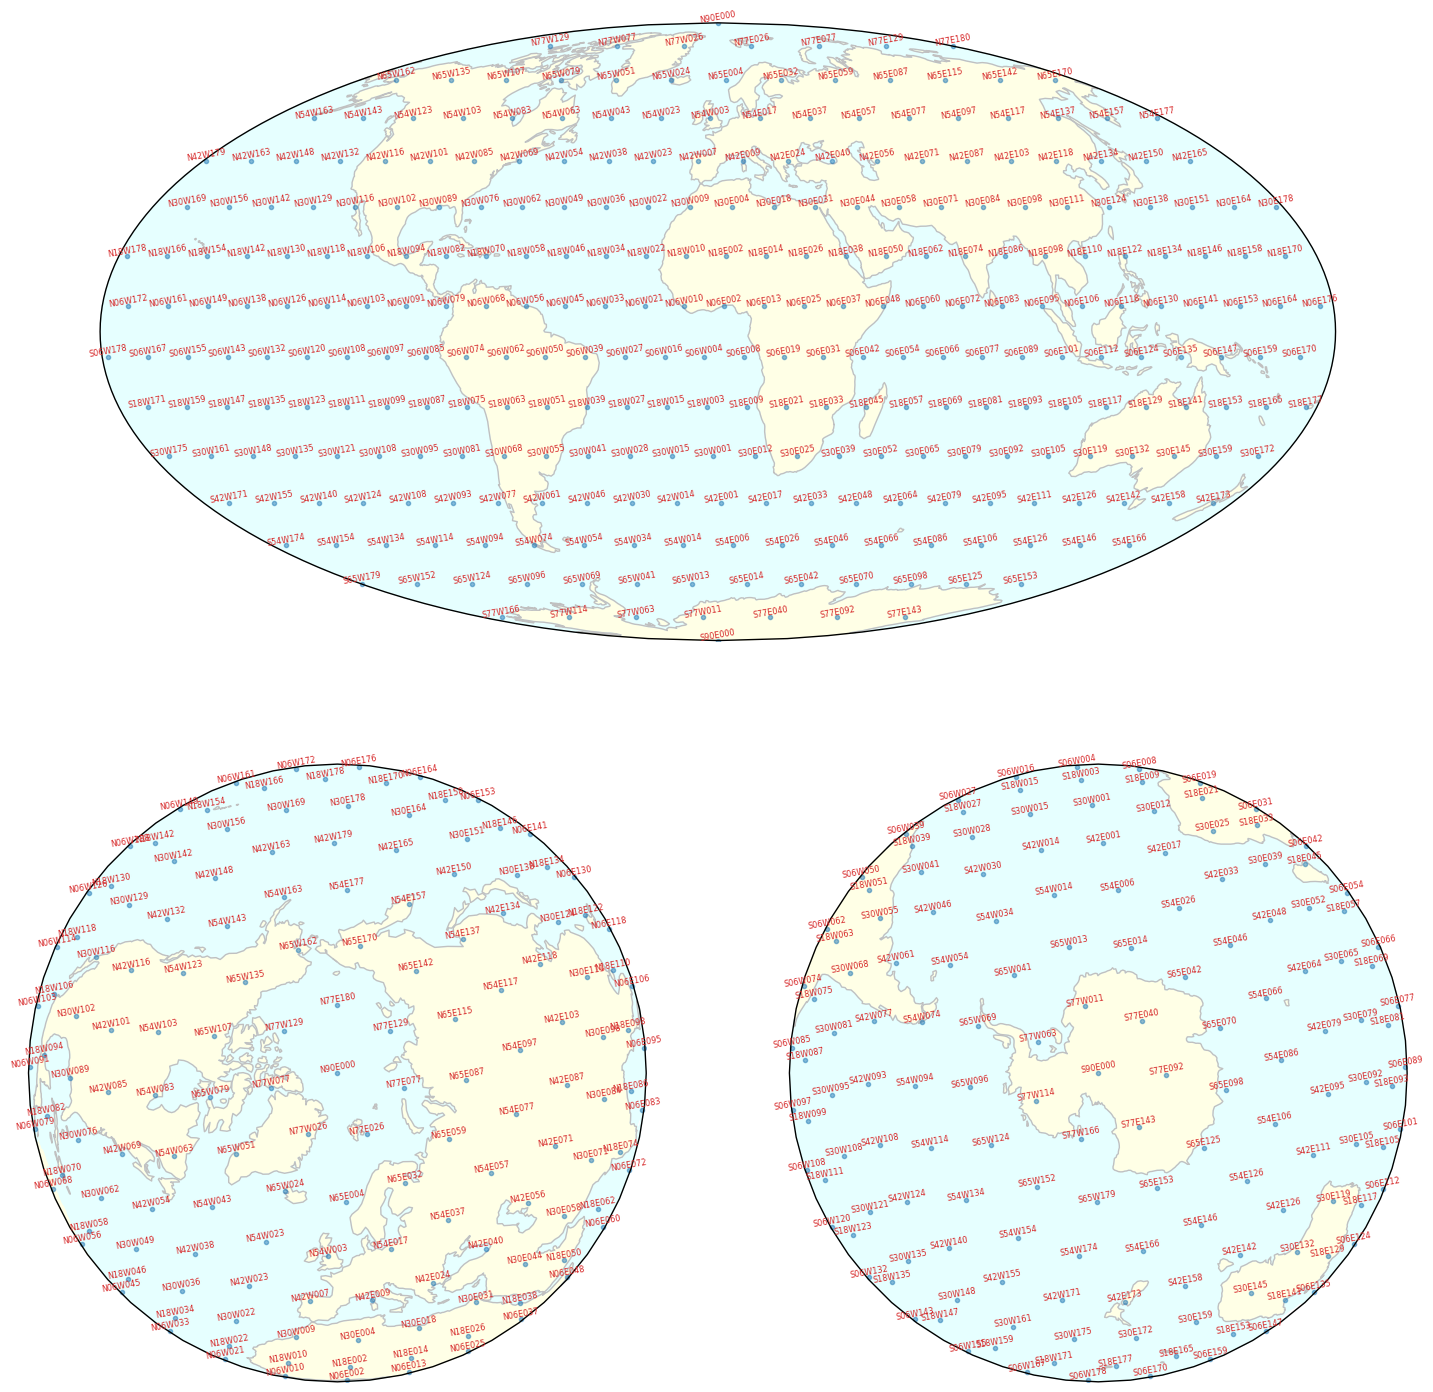

In [4]:
from matplotlib.pyplot import figure, subplot, show
from scipy.interpolate import interp1d
from cartopy.feature import LAND, OCEAN, COASTLINE
from cartopy.crs import Mollweide, Orthographic, PlateCarree


request = SwarmRequest(server_url)
request.set_collection('SW_OPER_VOBS_1M_2_')
request.set_products(
    measurements=VOBS_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data = request.get_between(
    start_time='2016-01-01T00:00:00Z',
    end_time='2017-01-01T00:00:00Z',
    asynchronous=True,
).as_xarray()

# ---------

print(data)

text_properties = dict(
    fontsize='xx-small',
    fontstretch='condensed',
    horizontalalignment='center',
    verticalalignment='baseline',
    rotation=10,
    color='tab:red',
)

def add_features(ax):
    ax.add_feature(LAND, facecolor=(1.0, 1.0, 0.9))
    ax.add_feature(OCEAN, facecolor=(0.9, 1.0, 1.0))
    ax.add_feature(COASTLINE, edgecolor='silver')
    return ax

%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)

times = data['Timestamp'].values
idx = (times == times.max()).nonzero()[0]


ax = add_features(subplot(2, 1, 1, projection=Mollweide()))
for lat, lon, code in zip(data['Latitude'].values[idx], data['Longitude'].values[idx], data['SiteCode'].values[idx]):
    ax.plot(lon, lat, '.', ms=6, alpha=0.5, color='tab:blue', transform=PlateCarree())
    ax.text(lon, lat, code, transform=PlateCarree(), **text_properties )

ax = add_features(subplot(2, 2, 3, projection=Orthographic(0, 90)))
for lat, lon, code in zip(data['Latitude'].values[idx], data['Longitude'].values[idx], data['SiteCode'].values[idx]):
    if lat < 0: continue
    ax.plot(lon, lat, '.', ms=6, alpha=0.5, color='tab:blue', transform=PlateCarree())
    ax.text(lon, lat, code, transform=PlateCarree(), **text_properties )

ax = add_features(subplot(2, 2, 4, projection=Orthographic(0, -90)))
for lat, lon, code in zip(data['Latitude'].values[idx], data['Longitude'].values[idx], data['SiteCode'].values[idx]):
    if lat > 0: continue
    ax.plot(lon, lat, '.', ms=6, alpha=0.5, color='tab:blue', transform=PlateCarree())
    ax.text(lon, lat, code, transform=PlateCarree(), **text_properties )


## VOBS_4M - list of virtual observatories - secular variation

In [5]:
observatories = request.available_observatories('SW_OPER_VOBS_4M_2_:SecularVariation', details=True)

print('Avaiable observatories and temporal extent of their data:')
print('site\t\tstartTime\t\t\tendTime')
for item in zip(observatories['site'], observatories['startTime'], observatories['endTime']):
    print("%s\t\t%s\t%s" % item)

Avaiable observatories and temporal extent of their data:
site		startTime			endTime
N06E002		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E013		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E025		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E037		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E048		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E060		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E072		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E083		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E095		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E106		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E118		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E130		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E141		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E153		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N06E164		2014-09-15T12:00:00+00:00	2020-05-15T12:00:00+00:00
N

## VOBS_4M - all virtual observatories - secular variation

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.115MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 900)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-15T12:00:00 ... 2016-09-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    QDLon       (Timestamp) float64 170.7 115.8 155.2 ... 12.73 35.87 17.16
    QDLat       (Timestamp) float64 83.79 74.1 72.54 ... -62.83 -65.48 -74.86
    Longitude   (Timestamp) float64 0.0 25.71 77.14 128.6 ... -62.67 -11.24 0.0
    sigma_SV    (Timestamp, NEC) float64 nan nan nan nan ... -12.62 5.988 -5.202
    Latitude    (Timestamp) float64 90.0 77.29 77.29 ... -77.29 -77.29 -90.0
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    B_SV        (Timestamp, NEC) float64 nan nan nan nan ... -24.17 -34.6 40.81
    SiteCode    (Timestamp) <U7 'N90E000' 'N77E026' ... 'S42W093' 'S42W077'
Attributes:
    Sources:         ['SW_OPER_VOBS_4M_2__20140301T000000_20201101T00

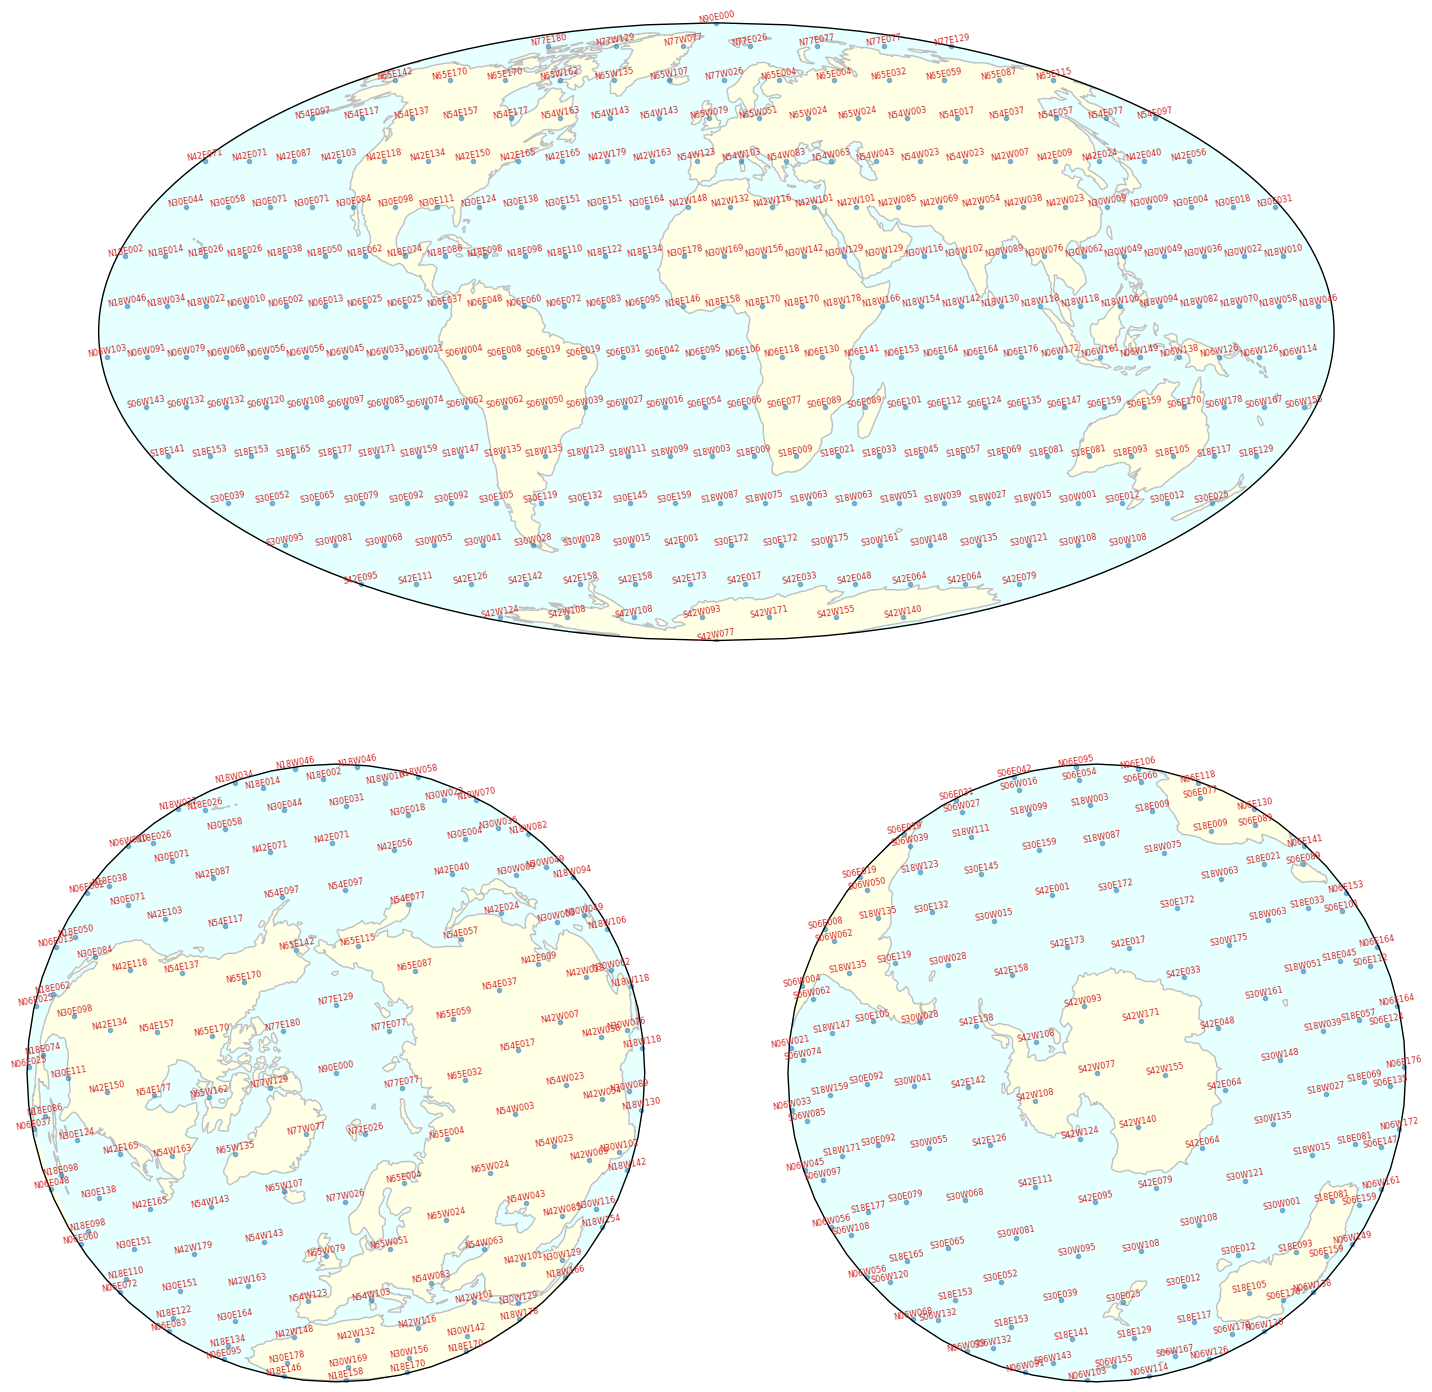

In [6]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_VOBS_4M_2_:SecularVariation')
request.set_products(
    measurements=VOBS_SV_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data = request.get_between(
    start_time='2016-01-01T00:00:00Z',
    end_time='2017-01-01T00:00:00Z',
    asynchronous=True,
).as_xarray()


# ---------

print(data)

text_properties = dict(
    fontsize='xx-small',
    fontstretch='condensed',
    horizontalalignment='center',
    verticalalignment='baseline',
    rotation=10,
    color='tab:red',
)

def add_features(ax):
    ax.add_feature(LAND, facecolor=(1.0, 1.0, 0.9))
    ax.add_feature(OCEAN, facecolor=(0.9, 1.0, 1.0))
    ax.add_feature(COASTLINE, edgecolor='silver')
    return ax

%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)

times = data['Timestamp'].values
idx = (times == times.max()).nonzero()[0]


ax = add_features(subplot(2, 1, 1, projection=Mollweide()))
for lat, lon, code in zip(data['Latitude'].values[idx], data['Longitude'].values[idx], data['SiteCode'].values[idx]):
    ax.plot(lon, lat, '.', ms=6, alpha=0.5, color='tab:blue', transform=PlateCarree())
    ax.text(lon, lat, code, transform=PlateCarree(), **text_properties )

ax = add_features(subplot(2, 2, 3, projection=Orthographic(0, 90)))
for lat, lon, code in zip(data['Latitude'].values[idx], data['Longitude'].values[idx], data['SiteCode'].values[idx]):
    if lat < 0: continue
    ax.plot(lon, lat, '.', ms=6, alpha=0.5, color='tab:blue', transform=PlateCarree())
    ax.text(lon, lat, code, transform=PlateCarree(), **text_properties )

ax = add_features(subplot(2, 2, 4, projection=Orthographic(0, -90)))
for lat, lon, code in zip(data['Latitude'].values[idx], data['Longitude'].values[idx], data['SiteCode'].values[idx]):
    if lat > 0: continue
    ax.plot(lon, lat, '.', ms=6, alpha=0.5, color='tab:blue', transform=PlateCarree())
    ax.text(lon, lat, code, transform=PlateCarree(), **text_properties )

## VOBS_1M vs VOBS_4M - one virtual observatory

In [7]:
from datetime import datetime

site = 'S77W114'

request = SwarmRequest(server_url)
request.set_collection(f'SW_OPER_VOBS_1M_2_:{site}')
request.set_products(
    measurements=VOBS_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data_1m = request.get_between(
    start_time='2013-01-01T10:00:00Z',
    end_time=datetime.now(),
    asynchronous=False,
).as_xarray()
print(data_1m)

# ---------

request = SwarmRequest(server_url)
request.set_collection(f'SW_OPER_VOBS_4M_2_:{site}')
request.set_products(
    measurements=VOBS_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data_4m = request.get_between(
    start_time='2013-01-01T10:00:00Z',
    end_time=datetime.now(),
    asynchronous=False,
).as_xarray()
print(data_4m)

# ---------

request = SwarmRequest(server_url)
request.set_collection(f'SW_OPER_VOBS_1M_2_:SecularVariation:{site}')
request.set_products(
    measurements=VOBS_SV_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data_1m_sv = request.get_between(
    start_time='2013-01-01T10:00:00Z',
    end_time=datetime.now(),
    asynchronous=False,
).as_xarray()
print(data_1m)

# ---------

request = SwarmRequest(server_url)
request.set_collection(f'SW_OPER_VOBS_4M_2_:SecularVariation:{site}')
request.set_products(
    measurements=VOBS_SV_VARIABLES,
    auxiliaries=['QDLat', 'QDLon'],
)
data_4m_sv = request.get_between(
    start_time='2013-01-01T10:00:00Z',
    end_time=datetime.now(),
    asynchronous=False,
).as_xarray()
print(data_4m)


      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.106MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 82)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2013-12-15T12:00:00 ... 2020-09-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    QDLon       (Timestamp) float64 -9.436 -9.435 -9.434 ... -9.66 -9.665 -9.67
    sigma_CF    (Timestamp, NEC) float64 nan nan nan nan ... -2.358 5.248 -7.765
    sigma_OB    (Timestamp, NEC) float64 -17.46 21.85 -7.305 ... 18.69 -9.703
    QDLat       (Timestamp) float64 -65.77 -65.78 -65.78 ... -65.91 -65.91
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 1.115e+04 -4.02e+04
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    B_OB        (Timestamp, NEC) float64 7.029e+03 1.118e+04 ... -4.021e+04
    SiteCode 

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.106MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 21)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-03-01T12:00:00 ... 2020-11-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    QDLon       (Timestamp) float64 -9.433 -9.428 -9.423 ... -9.658 -9.678
    sigma_CF    (Timestamp, NEC) float64 -3.435 7.412 -9.204 ... 7.412 -9.204
    sigma_OB    (Timestamp, NEC) float64 -13.37 14.66 -5.103 ... 20.13 -7.642
    QDLat       (Timestamp) float64 -65.78 -65.78 -65.79 ... -65.91 -65.92
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_CF        (Timestamp, NEC) float64 7.046e+03 1.118e+04 ... -4.017e+04
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    B_OB        (Timestamp, NEC) float64 7.044e+03 1.119e+04 ... -4.02e+04
    SiteCode    (Timest

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.088MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 82)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2013-12-15T12:00:00 ... 2020-09-15T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    QDLon       (Timestamp) float64 -9.436 -9.435 -9.434 ... -9.66 -9.665 -9.67
    sigma_CF    (Timestamp, NEC) float64 nan nan nan nan ... -2.358 5.248 -7.765
    sigma_OB    (Timestamp, NEC) float64 -17.46 21.85 -7.305 ... 18.69 -9.703
    QDLat       (Timestamp) float64 -65.77 -65.78 -65.78 ... -65.91 -65.91
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_CF        (Timestamp, NEC) float64 nan nan nan ... 1.115e+04 -4.02e+04
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    B_OB        (Timestamp, NEC) float64 7.029e+03 1.118e+04 ... -4.021e+04
    SiteCode 

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.088MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 21)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2014-03-01T12:00:00 ... 2020-11-01T12:00:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    QDLon       (Timestamp) float64 -9.433 -9.428 -9.423 ... -9.658 -9.678
    sigma_CF    (Timestamp, NEC) float64 -3.435 7.412 -9.204 ... 7.412 -9.204
    sigma_OB    (Timestamp, NEC) float64 -13.37 14.66 -5.103 ... 20.13 -7.642
    QDLat       (Timestamp) float64 -65.78 -65.78 -65.79 ... -65.91 -65.92
    Longitude   (Timestamp) float64 -114.1 -114.1 -114.1 ... -114.1 -114.1
    B_CF        (Timestamp, NEC) float64 7.046e+03 1.118e+04 ... -4.017e+04
    Latitude    (Timestamp) float64 -77.29 -77.29 -77.29 ... -77.29 -77.29
    Radius      (Timestamp) float64 6.861e+06 6.861e+06 ... 6.861e+06 6.861e+06
    B_OB        (Timestamp, NEC) float64 7.044e+03 1.119e+04 ... -4.02e+04
    SiteCode    (Timest

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


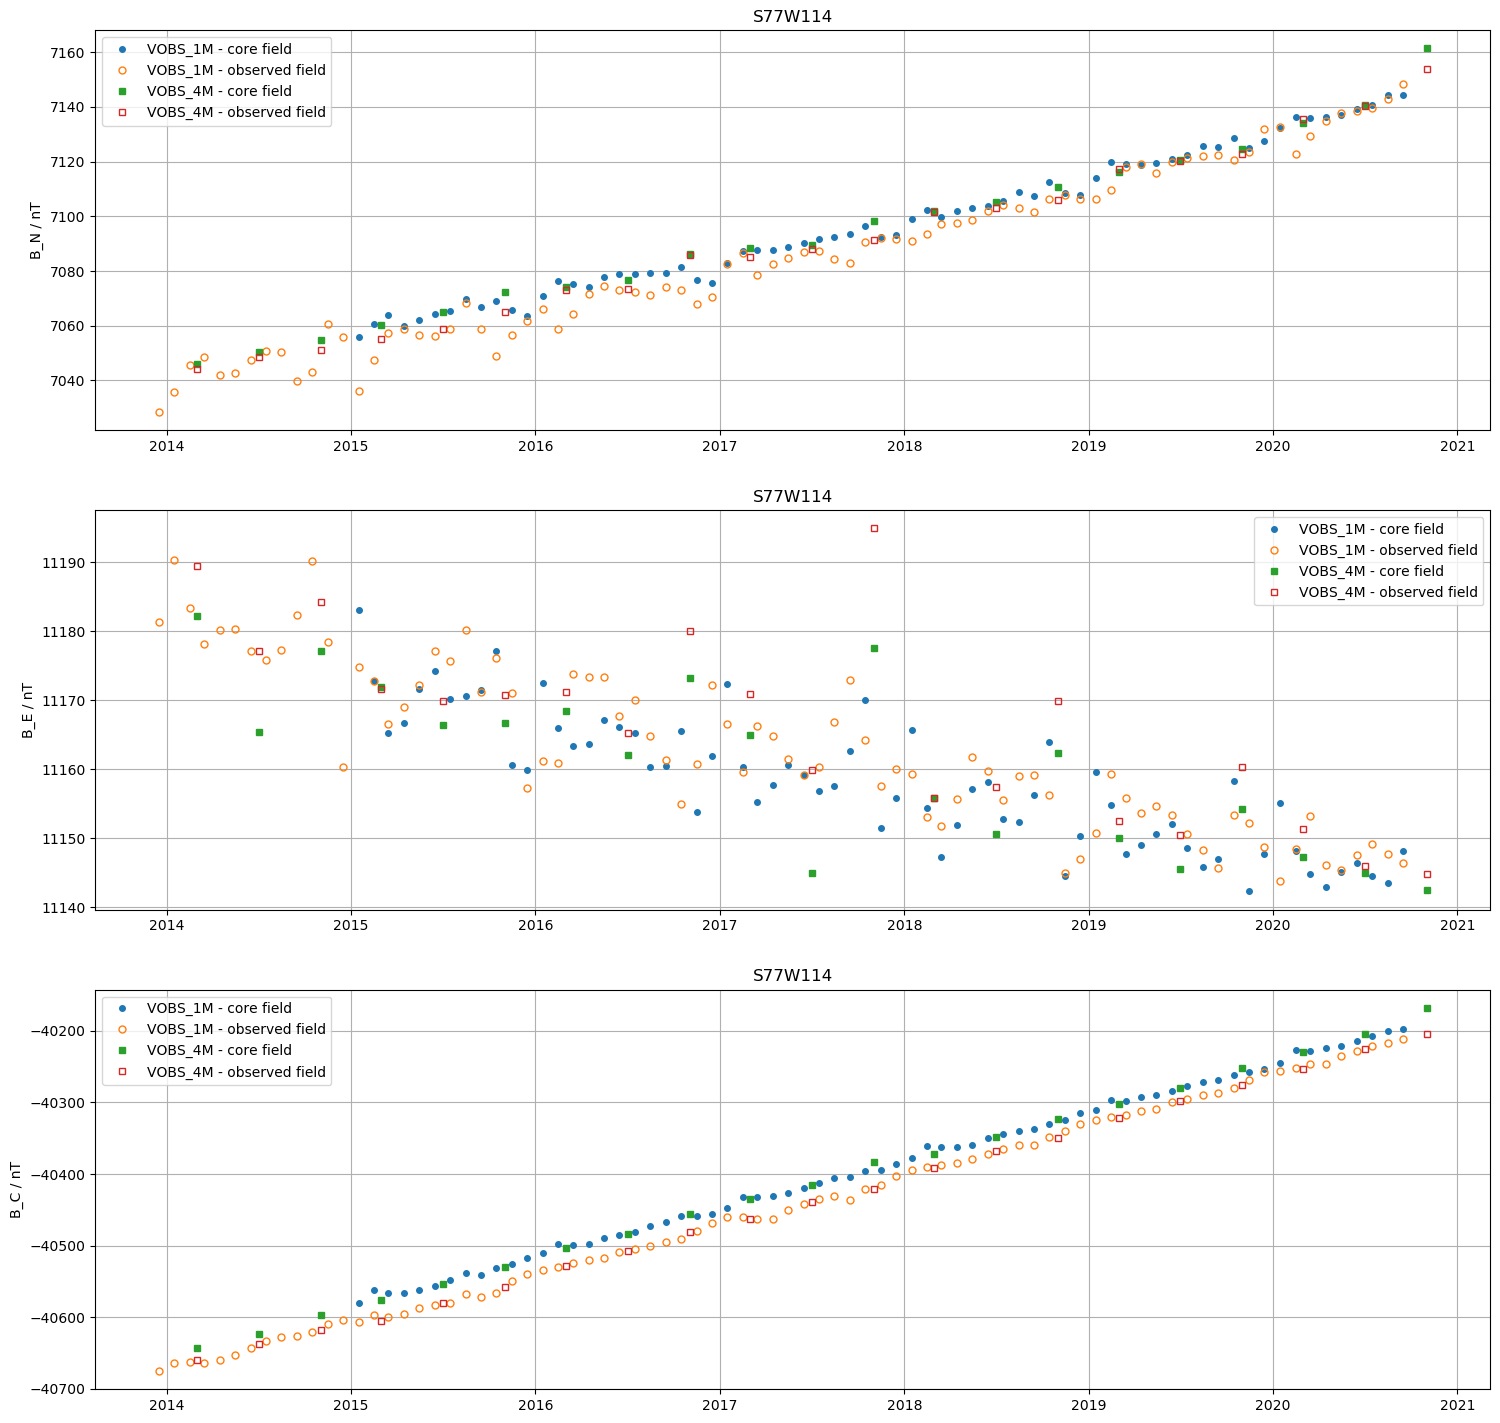

In [8]:
%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)

ax = subplot(3, 1, 1)
h_cf_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_CF'].values[:, 0], 'o', ms=4)
h_ob_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_OB'].values[:, 0], 'o', ms=5, mfc='none')
h_cf_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_CF'].values[:, 0], 's', ms=4)
h_ob_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_OB'].values[:, 0], 's', ms=5, mfc='none')

ax.set_title(site)
ax.set_ylabel('B_N / nT')
ax.grid()
ax.legend(
    [h_cf_1m, h_ob_1m, h_cf_4m, h_ob_4m],
    ['VOBS_1M - core field', 'VOBS_1M - observed field', 'VOBS_4M - core field', 'VOBS_4M - observed field']
)

ax = subplot(3, 1, 2)
h_cf_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_CF'].values[:, 1], 'o', ms=4)
h_ob_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_OB'].values[:, 1], 'o', ms=5, mfc='none')
h_cf_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_CF'].values[:, 1], 's', ms=4)
h_ob_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_OB'].values[:, 1], 's', ms=5, mfc='none')

ax.set_title(site)
ax.set_ylabel('B_E / nT')
ax.grid()
ax.legend(
    [h_cf_1m, h_ob_1m, h_cf_4m, h_ob_4m],
    ['VOBS_1M - core field', 'VOBS_1M - observed field', 'VOBS_4M - core field', 'VOBS_4M - observed field']
)

ax = subplot(3, 1, 3)
h_cf_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_CF'].values[:, 2], 'o', ms=4)
h_ob_1m, = ax.plot(data_1m['Timestamp'].values, data_1m['B_OB'].values[:, 2], 'o', ms=5, mfc='none')
h_cf_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_CF'].values[:, 2], 's', ms=4)
h_ob_4m, = ax.plot(data_4m['Timestamp'].values, data_4m['B_OB'].values[:, 2], 's', ms=5, mfc='none')

ax.set_title(site)
ax.set_ylabel('B_C / nT')
ax.grid()
ax.legend(
    [h_cf_1m, h_ob_1m, h_cf_4m, h_ob_4m],
    ['VOBS_1M - core field', 'VOBS_1M - observed field', 'VOBS_4M - core field', 'VOBS_4M - observed field']
)

show()

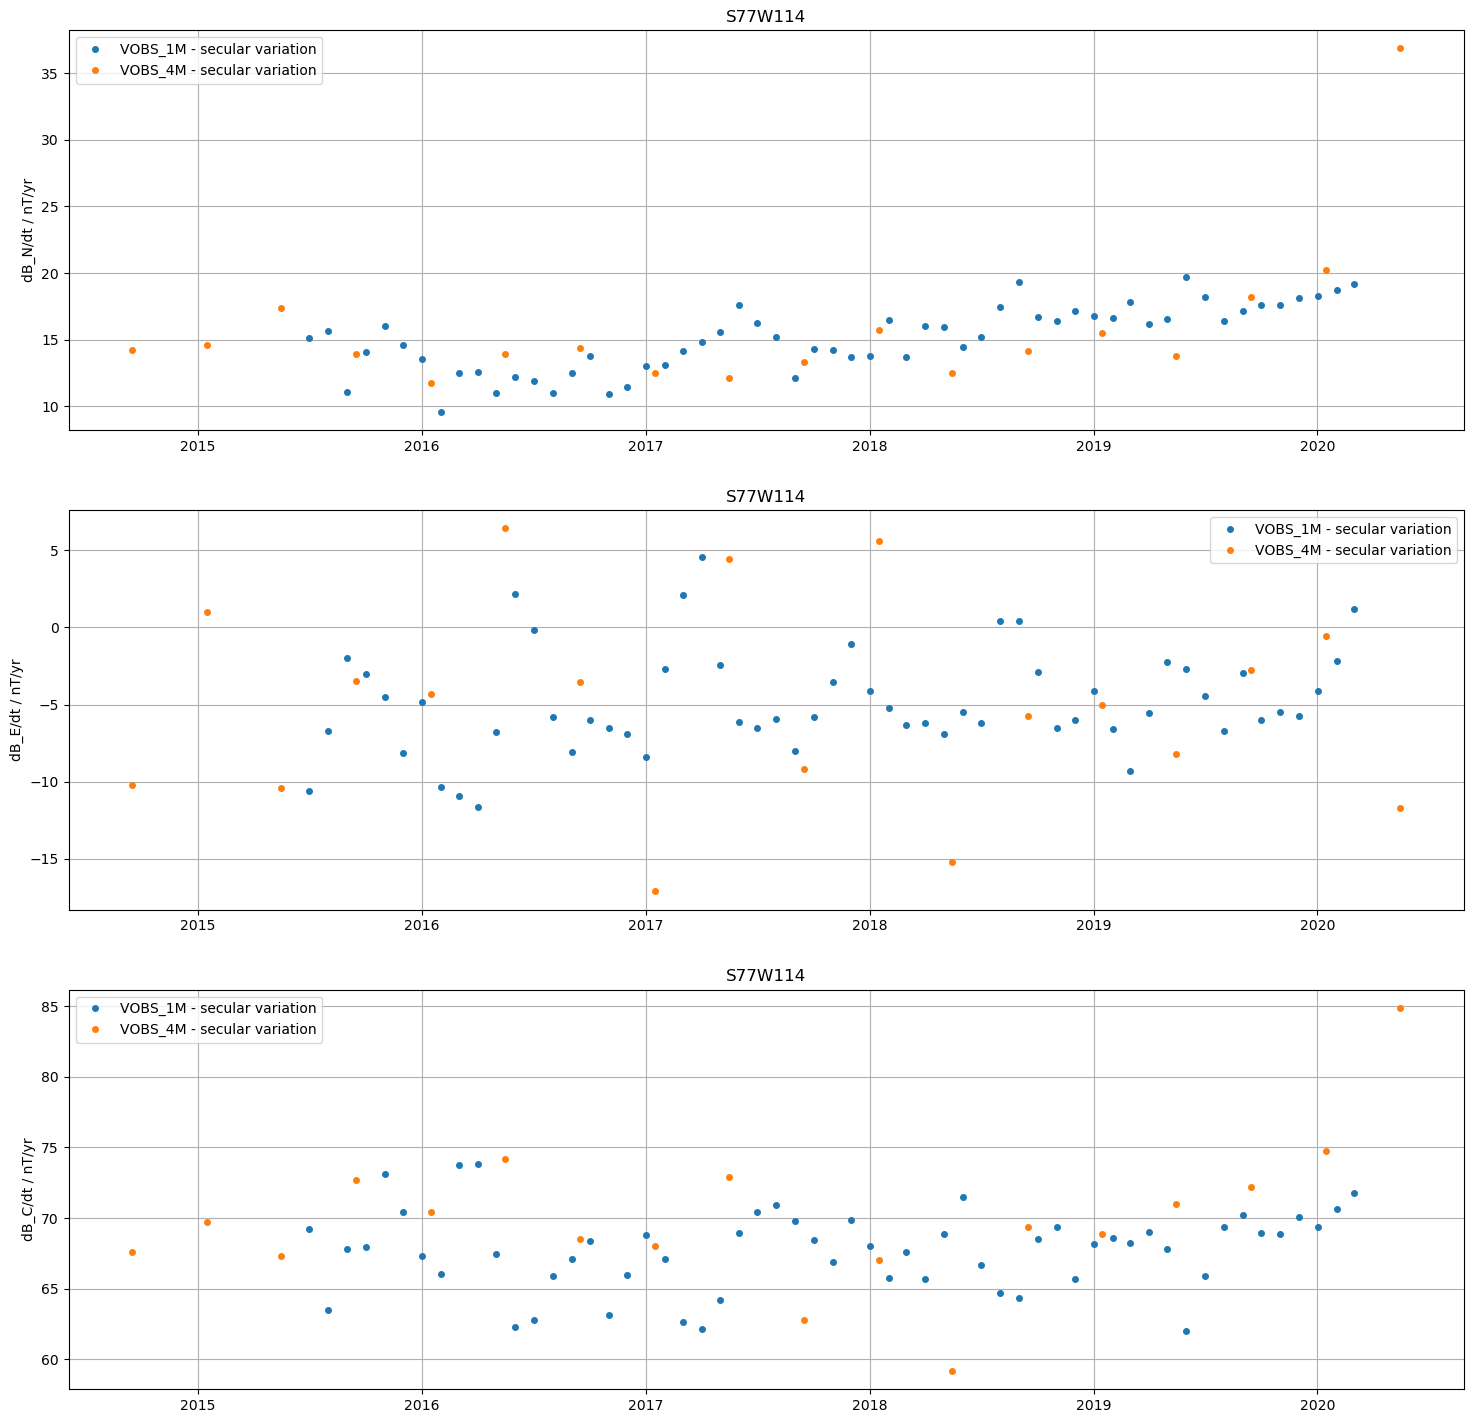

In [9]:
%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)

ax = subplot(3, 1, 1)
h_sv_1m, = ax.plot(data_1m_sv['Timestamp'].values, data_1m_sv['B_SV'].values[:, 0], 'o', ms=4)
h_sv_4m, = ax.plot(data_4m_sv['Timestamp'].values, data_4m_sv['B_SV'].values[:, 0], 'o', ms=4)

ax.set_title(site)
ax.set_ylabel('dB_N/dt / nT/yr')
ax.grid()
ax.legend([h_sv_1m, h_sv_4m], ['VOBS_1M - secular variation', 'VOBS_4M - secular variation'])

ax = subplot(3, 1, 2)
h_sv_1m, = ax.plot(data_1m_sv['Timestamp'].values, data_1m_sv['B_SV'].values[:, 1], 'o', ms=4)
h_sv_4m, = ax.plot(data_4m_sv['Timestamp'].values, data_4m_sv['B_SV'].values[:, 1], 'o', ms=4)

ax.set_title(site)
ax.set_ylabel('dB_E/dt / nT/yr')
ax.grid()
ax.legend([h_sv_1m, h_sv_4m], ['VOBS_1M - secular variation', 'VOBS_4M - secular variation'])

ax = subplot(3, 1, 3)
h_sv_1m, = ax.plot(data_1m_sv['Timestamp'].values, data_1m_sv['B_SV'].values[:, 2], 'o', ms=4)
h_sv_4m, = ax.plot(data_4m_sv['Timestamp'].values, data_4m_sv['B_SV'].values[:, 2], 'o', ms=4)

ax.set_title(site)
ax.set_ylabel('dB_C/dt / nT/yr')
ax.grid()
ax.legend([h_sv_1m, h_sv_4m], ['VOBS_1M - secular variation', 'VOBS_4M - secular variation'])

show()